## Task 1: Data Preparation

### Task 1A: Exploratory Data Analysis

Start with exploring the raw data that is available:
- Notice all sorts of properties of the dataset: how many records are there, how many
attributes, what kinds of attributes are there, ranges of values, distribution of values,
relationships between attributes, missing values, and so on. A table is often a suitable
way of showing such properties of a dataset. Notice if something is interesting (to you,
or in general), make sure you write it down if you find something worth mentioning.
- Make various plots of the data. Is there something interesting worth reporting? Re-
port the figures, discuss what is in them. What meaning do those bars, lines, dots, etc.
convey? Please select essential and interesting plots for discussion, as you have limited
space for reporting your findings.

### our answers:
Entries: 376912, of which 202 have missing value for the column'value'.

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read csv dataset with first column 
data = pd.read_csv('dataset_mood_smartphone.csv')
# convert time to datetime
data['time'] = pd.to_datetime(data['time'])
data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [83]:
data.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

In [84]:
# Show the data with the missing values
data[data.isnull().any(axis=1)].variable.unique()

array(['circumplex.arousal', 'circumplex.valence'], dtype=object)

NOTE THAT ALL THE MISSING DATA IS IN AROUSAL AND VALENCE

In [85]:
# show the range of 'value' column for each 'variable'
data.groupby('variable')['value'].agg(['min', 'max'])

,min,max
variable,,
activity,0.000,1.000
appCat.builtin,-82798.871,33960.246
appCat.communication,0.006,9830.777
appCat.entertainment,-0.011,32148.677
appCat.finance,0.131,355.513
appCat.game,1.003,5491.793
appCat.office,0.003,32708.818
appCat.other,0.014,3892.038
appCat.social,0.094,30000.906


NOTICE ABOVA THAT APPCAT.BUILTIN AND ENTERTAINMENT HAVE NEGATIVE VALUES!! THIS IS IMPOSSIBLE
ALSO NOTICE THAT CALL AND SMS ARE ALWAYS 1 SO THEY ARE PROBABLY REDUNDANT

/Users/timmooren/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/timmooren/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/timmooren/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

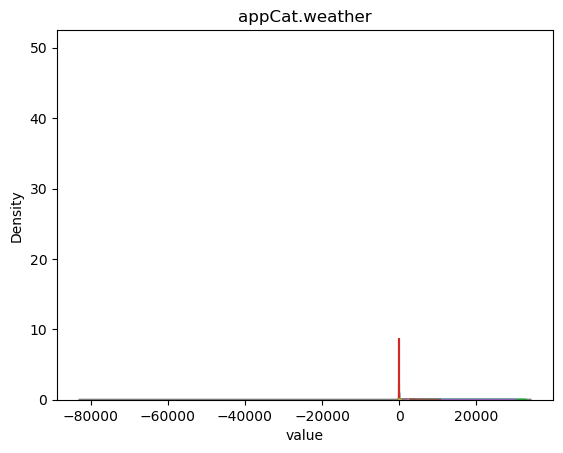

In [86]:
# for every groupplot the distribution of 'value' of each variable
for i in data.variable.unique():
    sns.distplot(data[data.variable == i].value)
    plt.title(i)
    # save plot
    plt.savefig('plots/' + i + '.png')

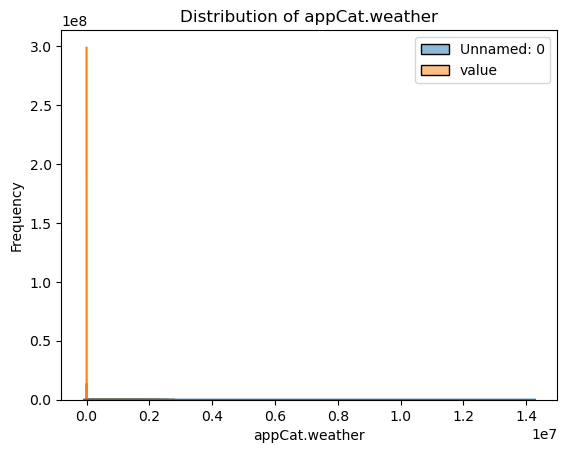

In [87]:
numerical_vars = ['circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'appCat.builtin', 'appCat.communication', 'appCat.entertainment', 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 'appCat.weather']

for var in numerical_vars:
    sns.histplot(data[data['variable'] == var], kde=True)

    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    # save plot
    plt.savefig('plots/' + var + '.png')

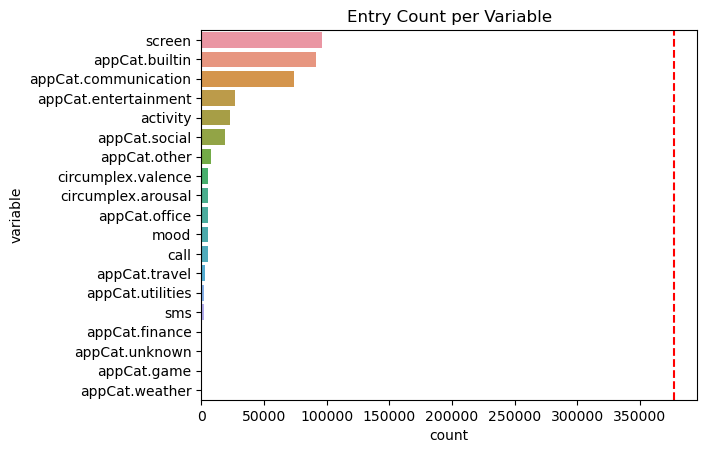

In [108]:
# barplot for the occurance of each variable. make the x axis vertical for better readability
sns.countplot(data=data, y='variable', order=data.variable.value_counts().index)
# add line representing the total number of entries
plt.axvline(data.shape[0], color='r', linestyle='--')
plt.title('Entry Count per Variable')
plt.savefig('plots/variable_count.png')

<AxesSubplot:xlabel='value', ylabel='variable'>

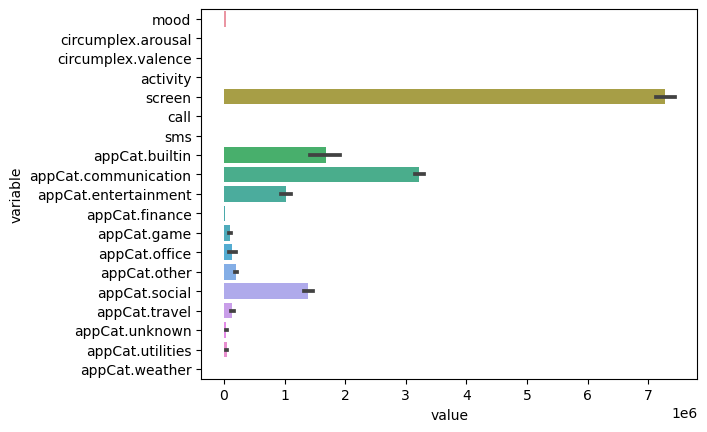

In [89]:
# make a barplot for the summed value for every group in column 'variable'
sns.barplot(data=data, x='value', y='variable', estimator=sum)

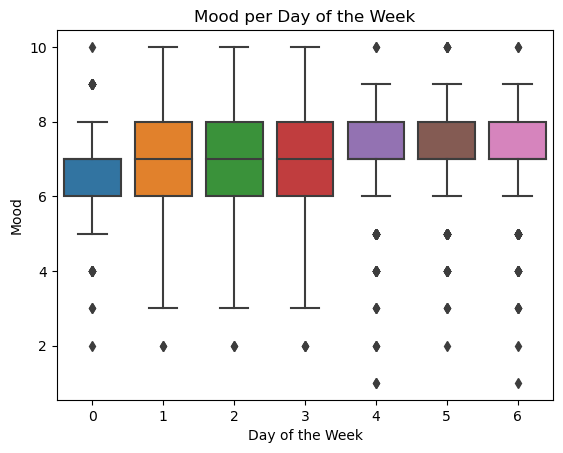

In [107]:
# horizontal boxplot the mood for every day of the week (0 = monday, 6 = sunday) and label the x axis with the day of the week
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.dayofweek, y='value')
plt.title('Mood per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mood')
plt.savefig('plots/mood_dayofweek.png')

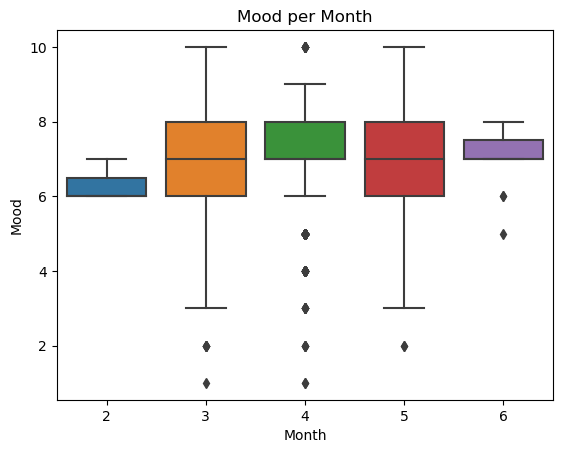

In [115]:
# mood per month
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.month, y='value')
plt.title('Mood per Month')
plt.xlabel('Month')
plt.ylabel('Mood')
plt.savefig('plots/mood_month.png')

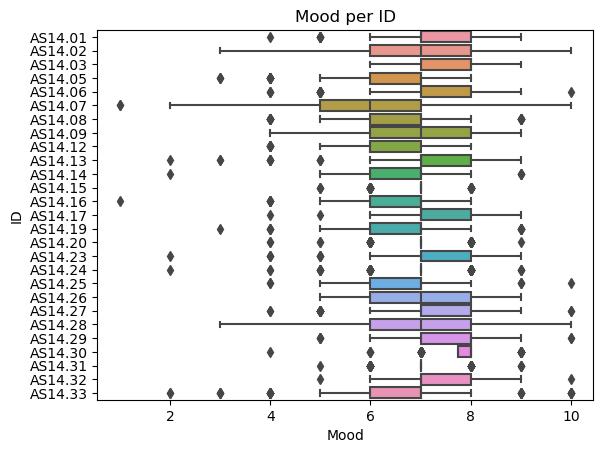

In [114]:
# horizontal boxplot of mood per id
sns.boxplot(data=data[data.variable == 'mood'], x='value', y='id')
plt.title('Mood per ID')
plt.xlabel('Mood')
plt.ylabel('ID')
plt.savefig('plots/mood_id.png')

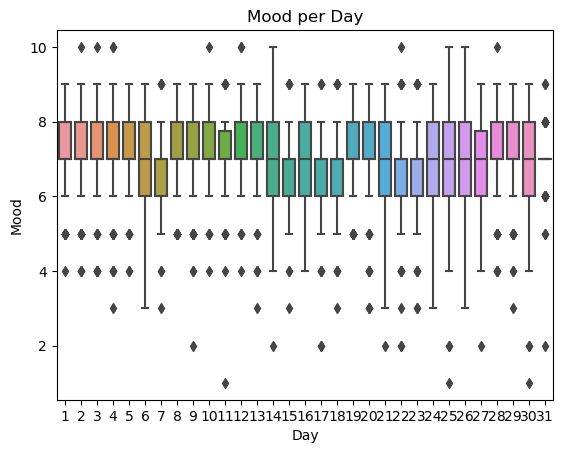

In [119]:
# mood per day
sns.boxplot(data=data[data.variable == 'mood'], x=data[data.variable == 'mood'].time.dt.day, y='value')
plt.title('Mood per Day')
plt.xlabel('Day')
plt.ylabel('Mood')
plt.savefig('plots/mood_day.png')

In [91]:
data_wide = data.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()
data_wide

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358921,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358922,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358923,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358924,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# sum variables
sum_vars = ['appCat.builtin', 'appCat.communication', 'appCat.entertainment', 
                 'appCat.finance', 'appCat.game', 'appCat.office', 'appCat.other', 
                 'appCat.social', 'appCat.travel', 'appCat.unknown', 'appCat.utilities', 
                 'appCat.weather']
# mean variables
mean_vars = ['circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'mood']
# convert time to datetime
data_wide['time'] = pd.to_datetime(data_wide['time'])

# group the wide data by day and id and aggregate the sum and mean of the variables
data_wide = data_wide.groupby(pd.Grouper(key='time', freq='D')).agg({**{var: 'sum' for var in sum_vars}, **{var: 'mean' for var in mean_vars}})
data_wide

variable,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,circumplex.arousal,circumplex.valence,activity,screen,mood
time,,,,,,,,,,,,,,,,,
2014-02-17,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2014-02-18,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2014-02-19,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2014-02-20,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2014-02-21,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-05,1749.277,958.821,0.0,0.0,0.0,0.0,47.360,171.964,225.737,0.0,0.000,0.0,0.0,1.0,0.152343,40.196424,7.0
2014-06-06,945.898,1710.924,0.0,0.0,0.0,0.0,36.414,0.000,0.000,0.0,2.072,0.0,0.5,1.0,0.189476,47.953193,7.5
2014-06-07,5027.498,735.965,0.0,0.0,0.0,0.0,6.214,106.850,0.000,0.0,0.000,0.0,-1.0,NaN,0.081893,128.613442,8.0


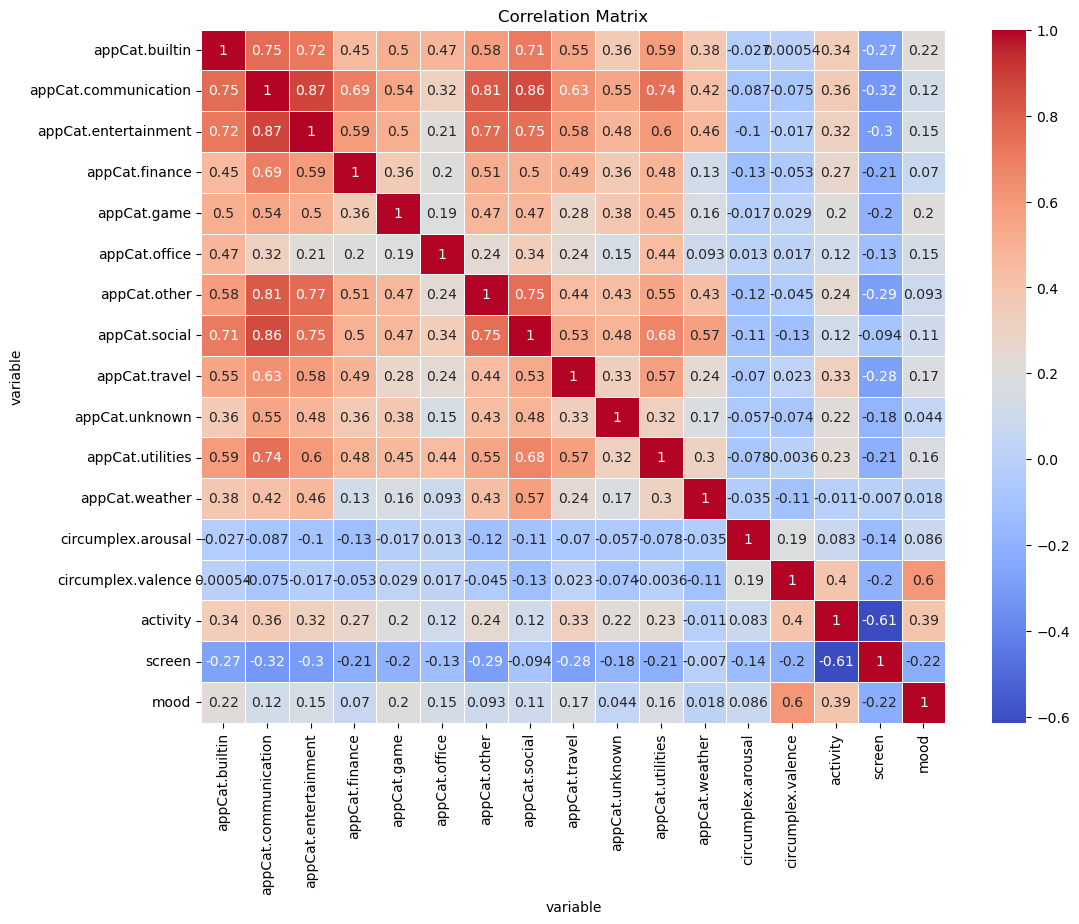

In [93]:
corr = data_wide.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [94]:
# group the data by 'id' and calculate the mean of the values
data_mean = data_wide.groupby('id').mean()
data_mean

KeyError: 'id'

<AxesSubplot:xlabel='variable', ylabel='variable'>

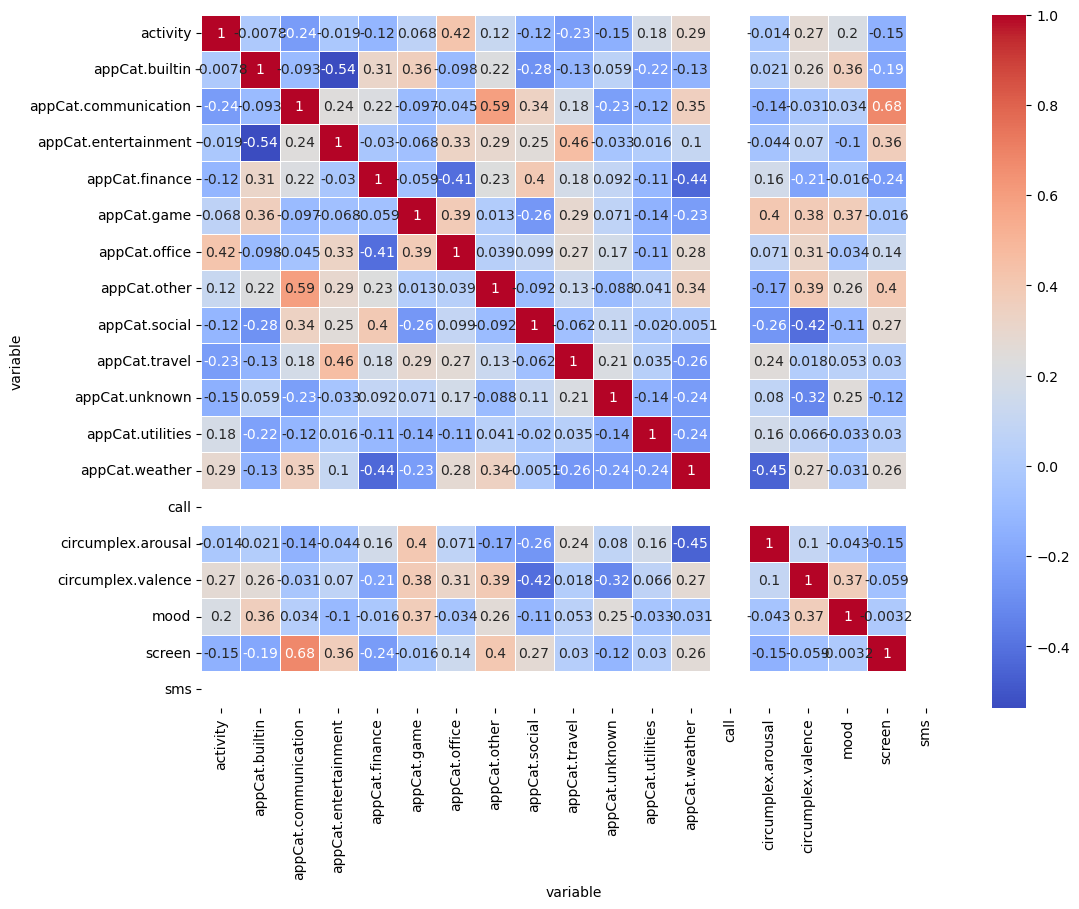

In [ ]:
# calculate the correlation matrix for the mean values
corr_mean = data_mean.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_mean, annot=True, cmap='coolwarm', linewidths=0.5)

### Task 1B: Data cleaning

Remove incorrect values:

In [ ]:
# remove all rows from data where appCat.builtin or appCat.entertainmentis negative
data = data[~((data['variable'] == 'appCat.builtin') & (data['value'] < 0))]
data = data[~((data['variable'] == 'appCat.entertainment') & (data['value'] < 0))]

In [ ]:
# transform the data to wide format
data_wide = data.pivot_table(index=['id', 'time'], columns='variable', values='value').reset_index()
data_wide

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,circumplex.arousal,circumplex.valence,mood,screen
0,AS14.01,2014-02-26 13:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,6.0,NaN
1,AS14.01,2014-02-26 15:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,6.0,NaN
2,AS14.01,2014-02-26 18:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,6.0,NaN
3,AS14.01,2014-02-26 21:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,7.0,NaN
4,AS14.01,2014-02-27 09:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.0,0.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351882,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN
351883,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351884,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351885,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time', ylabel='mood'>

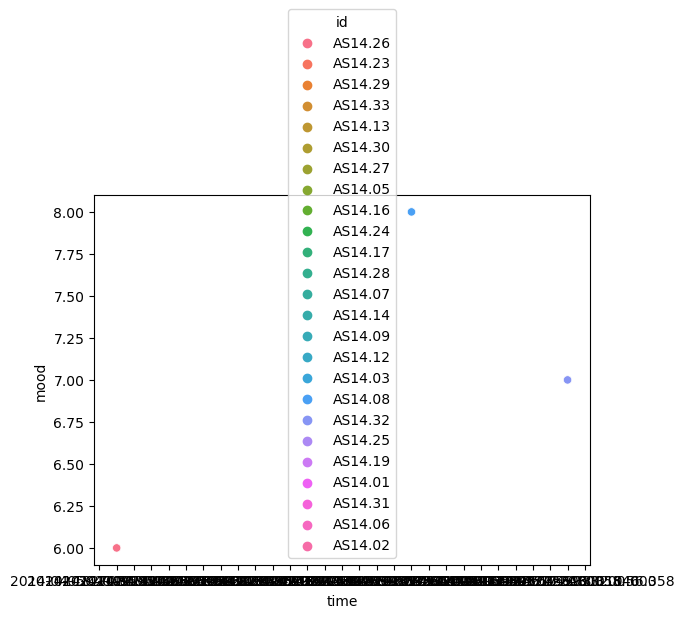

In [ ]:
# plot the values of the variable 'mood' over time by id for a random sample of 100 entries
sns.scatterplot(data=data_wide.sample(100), x='time', y='mood', hue='id')

In [ ]:
# convert the time column to datetime
data_wide['time'] = pd.to_datetime(data_wide['time'])
data_wide.time.max() - data_wide.time.min()

Timedelta('102 days 11:00:00')